Ejercicio 3: Para cada categoría, realizar las siguientes tareas: ● Procesar el texto mediante recursos de normalización y limpieza. ● Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras. Escribir un análisis general del resultado obtenido.

In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [33]:
df = pd.read_csv("/content/lacapital.csv")

In [34]:
df = df.dropna(subset=['texto'])#habia un valor NAN lo elimino

In [35]:
df['texto'] = df['texto'].str.replace('[^\w\s]', '')#eliminamos los puntos

<ipython-input-35-c5bdde5b392e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['texto'] = df['texto'].str.replace('[^\w\s]', '')#eliminamos los puntos


In [36]:
df["texto"]= df["texto"].str.lower()

In [37]:
import unicodedata
def remove_accents(input_str):
  nfkd_form = unicodedata.normalize('NFKD', input_str)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

df["texto"] = df["texto"].apply(remove_accents)
df["texto"]

0      el servicio meteorologico nacional smn indico ...
1      provincial debutara este sabado a las 22 en el...
2      la actividad economica de santa fe cayo 76 en ...
3      con el refuerzo del swap chino y de las fuerza...
4      este sabado finaliza la fase regular del top 1...
                             ...                        
210    julio alberto ramirez un changarin del mercado...
211    en un comunicado difundido este sabado el cons...
212    argentina sumo la novena victima fatal en meno...
213    en esta jornada sabatina bien tempranito el ro...
214    a florencio ambrossi sus vecinos lo conocian p...
Name: texto, Length: 212, dtype: object

In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Descargar el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')


# Definir las palabras de parada en español
stop_words = set(stopwords.words('spanish'))

# Función para eliminar las palabras de parada de una frase
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
  return " ".join(filtered_text)
# Aplicar la función a cada tweet
df['texto'] = df['texto'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# Instalamos las librerías necesarias
!pip install autocorrect #tarda mucho el codigo por eso esta comentado

In [40]:
!pip install pyspellchecker

In [41]:
"""from autocorrect import Speller #ATENCION TARDA MUCHO
from spellchecker import SpellChecker
# Configurar el corrector ortográfico para español
spell_1 = Speller(lang='es')


# Aplicar la corrección ortográfica
df['texto'] = df['texto'].apply(lambda x: ' '.join([spell_1(i) for i in x.split()]))"""

"from autocorrect import Speller #ATENCION TARDA MUCHO\nfrom spellchecker import SpellChecker\n# Configurar el corrector ortográfico para español\nspell_1 = Speller(lang='es')\n\n\n# Aplicar la corrección ortográfica\ndf['texto'] = df['texto'].apply(lambda x: ' '.join([spell_1(i) for i in x.split()]))"

In [42]:
texto = ' '.join(df["texto"])

In [43]:
#Tokenización de texto

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

categorias = df["categoria"].unique()

for categoria in categorias:

    noticias_categoria = df[df["categoria"] == categoria]["texto"].tolist()
    frecuencias_categoria = []

    for noticia in noticias_categoria:

        words = word_tokenize(noticia)#tokeniza
        fdist_words = FreqDist(words) # Creamos un objeto FreqDist para las palabras


    # Imprimir el top de palabras para esta categoría
    print(f"Top 10 palabras en la categoría '{categoria}':")
    for palabra, frecuencia in FreqDist(fdist_words).most_common(10):
        print(f"{palabra}: {frecuencia}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 palabras en la categoría 'La Ciudad':
heladerias: 3
cupon: 3
mesa: 3
cadena: 2
domingo: 2
sucursales: 2
trata: 2
propuesta: 2
agradecimiento: 2
comicios: 2
Top 10 palabras en la categoría 'Ovación':
ignacio: 9
dos: 8
remos: 6
timonel: 6
joel: 5
pacheco: 4
panamericanos: 4
junto: 4
santiago: 4
mas: 4
Top 10 palabras en la categoría 'Economía':
millones: 10
us: 9
mas: 8
empresas: 7
semana: 6
clientes: 6
anos: 6
criptomonedas: 6
gemini: 6
unidos: 5
Top 10 palabras en la categoría 'Educación':
escuela: 13
barrio: 8
fontanarrosa: 6
chicos: 5
educacion: 4
secundaria: 4
familias: 4
estudiantes: 4
salud: 4
publica: 3
Top 10 palabras en la categoría 'El Mundo':
silberman: 4
hamas: 3
argentina: 2
fatal: 2
grupo: 2
sur: 2
israel: 2
cancilleria: 2
aun: 2
rehenes: 2
Top 10 palabras en la categoría 'Mundial de Rugby 2023':
sudafrica: 4
asi: 4
mundo: 3
bien: 3
semifinal: 2
resulto: 2
partido: 2
tiempo: 2
inglaterra: 2
springboks: 2
Top 10 palabras en la categoría 'Política':
argentinos: 4
vota

In [56]:
palabra

('si', 4)

In [45]:
 #Instalar la librería wordcloud
!pip install wordcloud

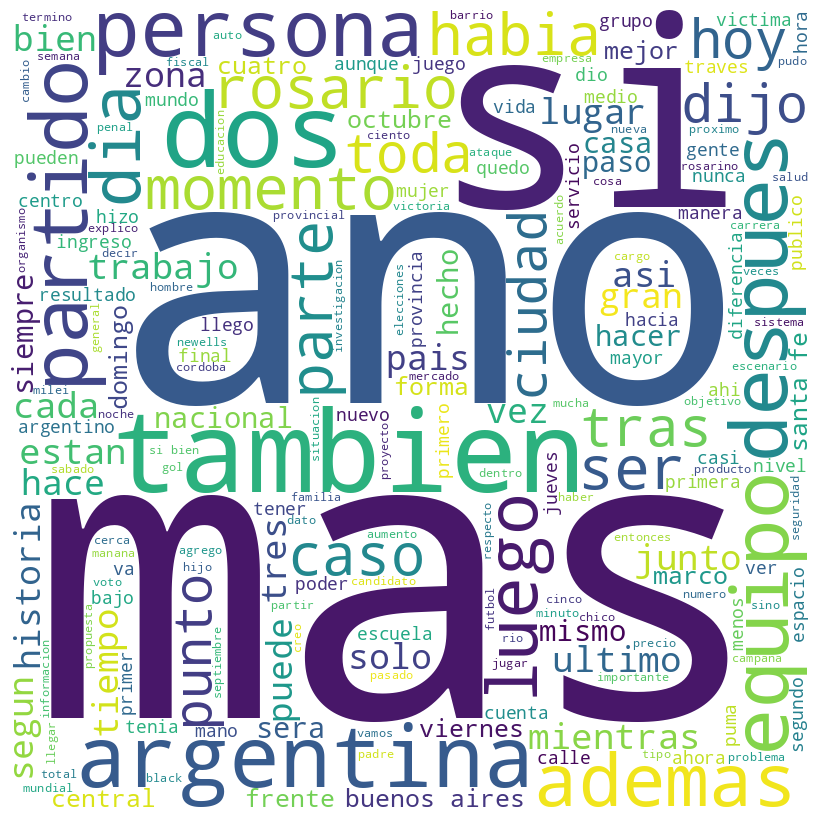

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Tu texto
texto = ' '.join(df["texto"])
# Crear la nube de palabras
wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = None,
min_font_size = 10).generate(texto)
# Mostrar la imagen
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

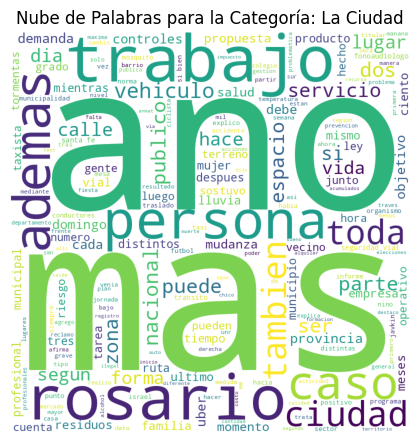

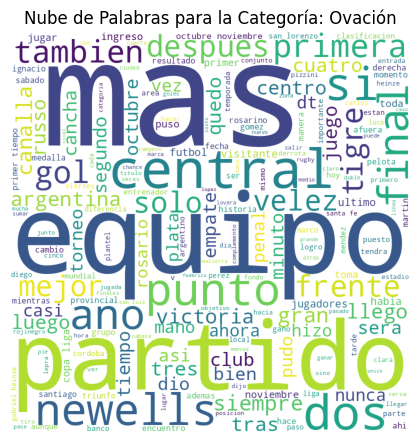

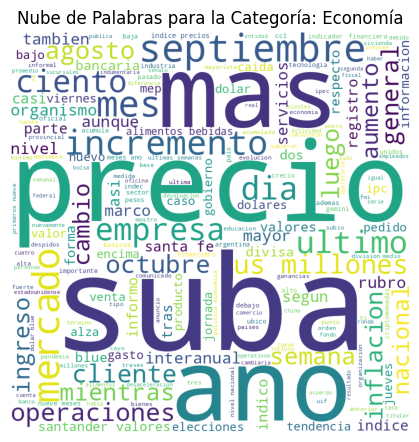

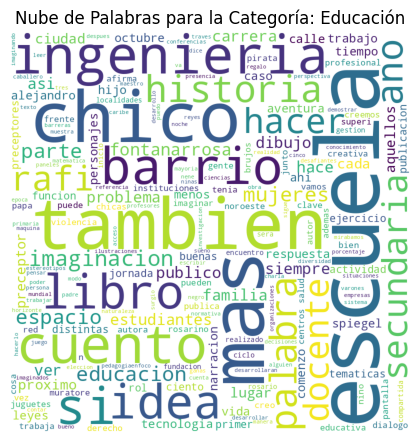

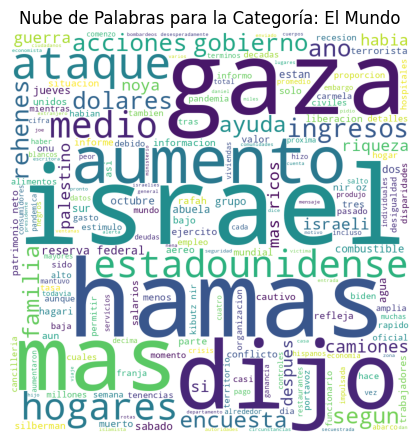

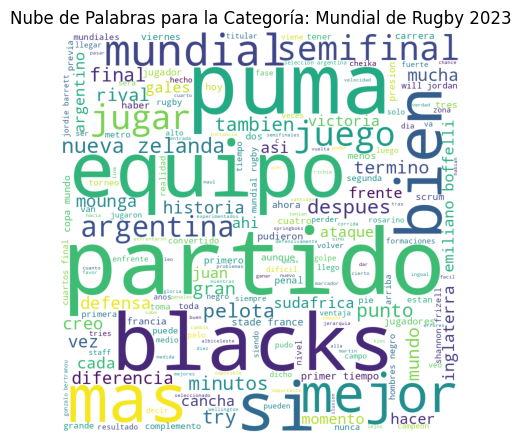

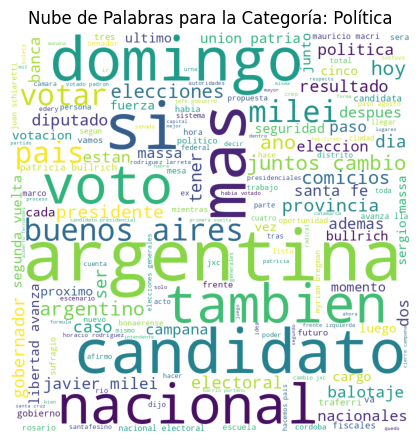

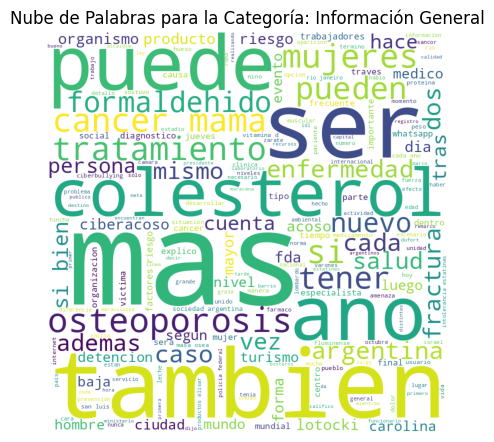

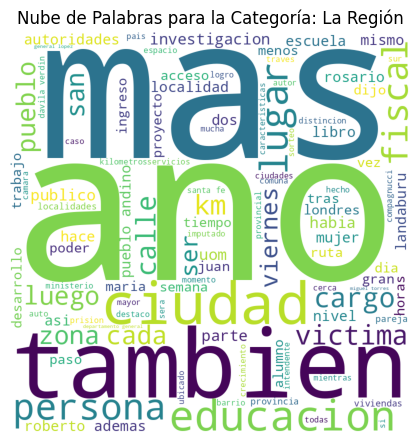

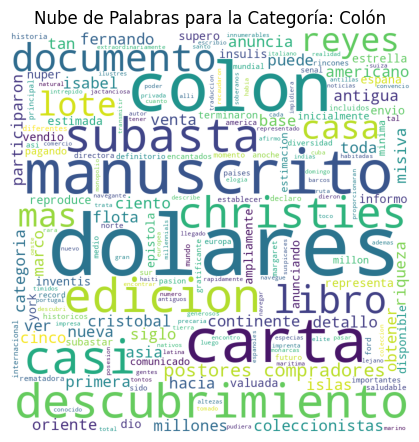

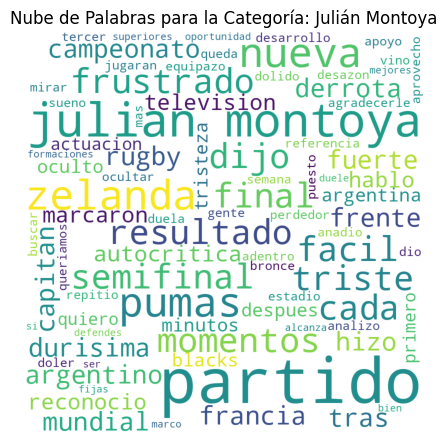

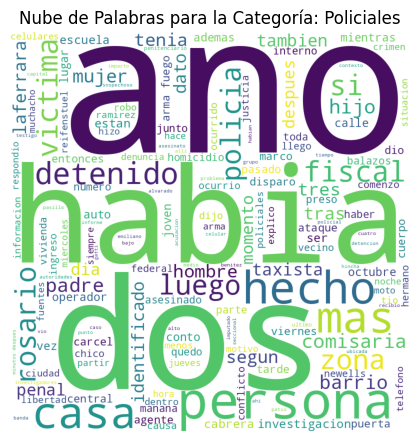

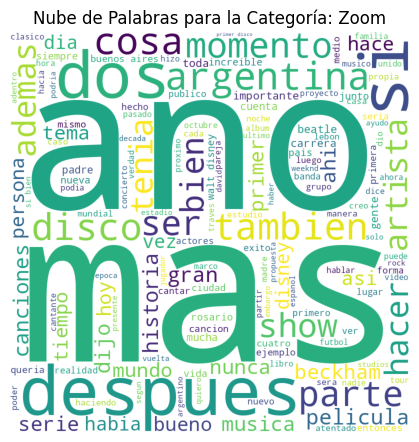

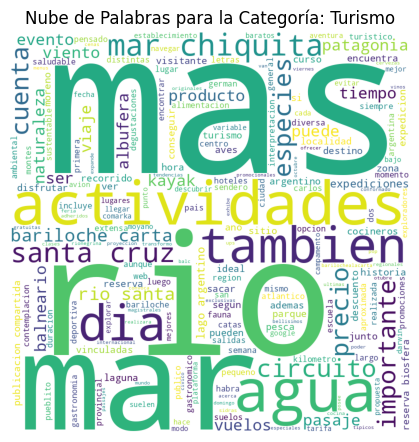

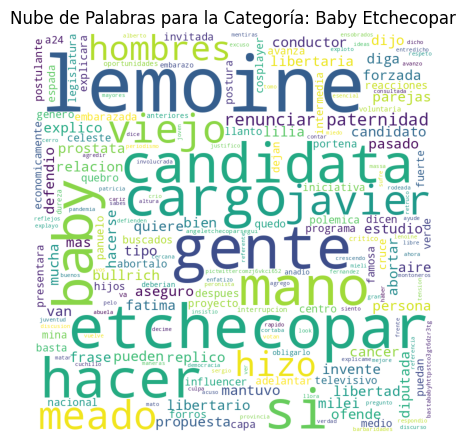

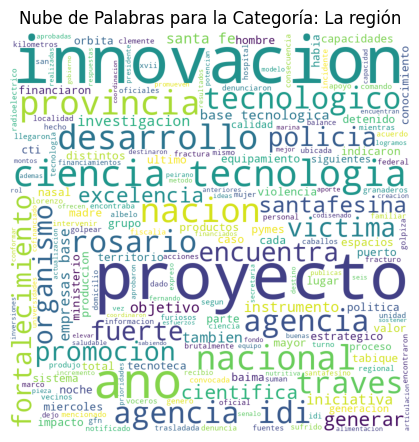

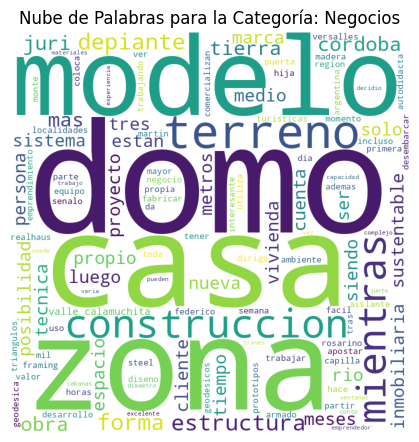

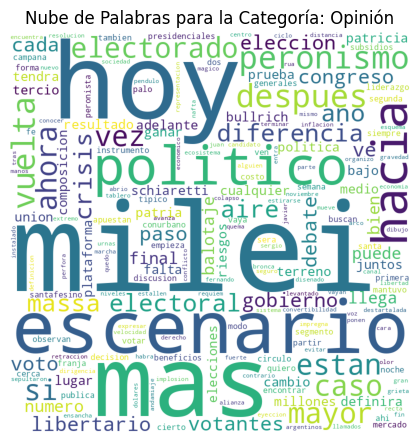

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categorias = df["categoria"].unique()

for categoria in categorias:

    texto_categoria = ' '.join(df[df["categoria"] == categoria]["texto"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate(texto_categoria)

    plt.figure(figsize=(4, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Nube de Palabras para la Categoría: {categoria}')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
